In [1]:
# Note: The purpose of this is to not actually use this model predict stock returns, but rather to just see how well it does in doing so. Transaction costs are not taken into account.
# The idea of this strategy is that if the next day predicted direction is +ve, the asset will be bought/held. If the next day predicted direction is -ve, the asset will be sold/shorted.
# This model can only attempt to forecast the direction of the asset for the next trading day, and no more.

In [2]:
import yfinance as yf
import numpy as np

In [3]:
df = yf.download("SPY", start = "2021-01-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,355.446777,110210800
2021-01-05,368.100006,372.500000,368.049988,371.329987,357.894836,66426200
2021-01-06,369.709991,376.980011,369.119995,373.549988,360.034546,107997700
2021-01-07,376.100006,379.899994,375.910004,379.100006,365.383759,68766800
2021-01-08,380.589996,381.489990,377.100006,381.260010,367.465546,71677200
...,...,...,...,...,...,...
2023-07-24,453.369995,455.040009,452.299988,454.200012,454.200012,54023400
2023-07-25,453.920013,456.739990,453.869995,455.440002,455.440002,55191200
2023-07-26,454.470001,456.989990,453.380005,455.510010,455.510010,71052900


In [4]:
df["returns"] = np.log(df.Close.pct_change()+1) # The reason we add +1 is because natural logarithm cannot take in -ve values.
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'returns'], dtype='object')


In [5]:
df["direction"] = [1 if i > 0 else -1 for i in df.returns] # Basically says if daily returns, i, are +ve give a value of 1, if not then -1.

In [6]:
def lagit(df, lags): # Lag returns are just the returns from the previous n days.
    names = [] # This initializes an empty list, called names which will be used to store the names of the new "direction" ("Lag"+str(i)+"dir") columns that will be created.
    for i in range(1, lags+1): 
        df["Lag"+str(i)] = df["returns"].shift(i) 
        df["Lag"+str(i)+"dir"] = [1 if j>0 else -1 for j in df["Lag"+str(i)]]
        names.append("Lag"+str(i)+"dir") 
    return names

In [7]:
# In this, we're calling the lagit() function on our DataFrame df and we're creating 2 lags (since lags=2). This means we'll create 2 new columns Lag_1 and Lag_2 which are lagged versions of the "returns" column. Also, we will create 2 new columns Lag_1_dir and Lag_2_dir indicating the direction of the returns.
dirnames = lagit(df,2)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag1,Lag1dir,Lag2,Lag2dir
Date,,,,,,,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,355.446777,110210800,NaN,-1,NaN,-1,NaN,-1
2021-01-05,368.100006,372.500000,368.049988,371.329987,357.894836,66426200,0.006864,1,NaN,-1,NaN,-1
2021-01-06,369.709991,376.980011,369.119995,373.549988,360.034546,107997700,0.005961,1,0.006864,1,NaN,-1
2021-01-07,376.100006,379.899994,375.910004,379.100006,365.383759,68766800,0.014748,1,0.005961,1,0.006864,1
2021-01-08,380.589996,381.489990,377.100006,381.260010,367.465546,71677200,0.005682,1,0.014748,1,0.005961,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,453.369995,455.040009,452.299988,454.200012,454.200012,54023400,0.004457,1,0.000000,-1,-0.006657,-1
2023-07-25,453.920013,456.739990,453.869995,455.440002,455.440002,55191200,0.002726,1,0.004457,1,0.000000,-1
2023-07-26,454.470001,456.989990,453.380005,455.510010,455.510010,71052900,0.000154,1,0.002726,1,0.004457,1


In [9]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag1,Lag1dir,Lag2,Lag2dir
Date,,,,,,,,,,,,
2021-01-07,376.100006,379.899994,375.910004,379.100006,365.383759,68766800,0.014748,1,0.005961,1,0.006864,1
2021-01-08,380.589996,381.489990,377.100006,381.260010,367.465546,71677200,0.005682,1,0.014748,1,0.005961,1
2021-01-11,377.850006,380.579987,377.720001,378.690002,364.988586,51034700,-0.006764,-1,0.005682,1,0.014748,1
2021-01-12,378.890015,379.859985,376.359985,378.769989,365.065674,52547700,0.000211,1,-0.006764,-1,0.005682,1
2021-01-13,378.690002,380.859985,377.850006,379.790009,366.048828,45303600,0.002689,1,0.000211,1,-0.006764,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,453.369995,455.040009,452.299988,454.200012,454.200012,54023400,0.004457,1,0.000000,-1,-0.006657,-1
2023-07-25,453.920013,456.739990,453.869995,455.440002,455.440002,55191200,0.002726,1,0.004457,1,0.000000,-1
2023-07-26,454.470001,456.989990,453.380005,455.510010,455.510010,71052900,0.000154,1,0.002726,1,0.004457,1


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
#  Logistic regression is a statistical model used in machine learning for binary classification problems, where the outcome can be one of two possible categories.
# We're training the Logit model using the features (the data in columns dirnames) and the target (the data in column direction).
model.fit(df[dirnames], df["direction"]) # The independent variable is df[dirnames], while the dependent variable is df["direction"].

LogisticRegression()

In [13]:
df["model_predicted_direction"] = model.predict(df[dirnames]) # This predicts where the whether the asset will have +ve or -ve returns the next day.
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag1,Lag1dir,Lag2,Lag2dir,model_predicted_direction
Date,,,,,,,,,,,,,
2021-01-07,376.100006,379.899994,375.910004,379.100006,365.383759,68766800,0.014748,1,0.005961,1,0.006864,1,-1
2021-01-08,380.589996,381.489990,377.100006,381.260010,367.465546,71677200,0.005682,1,0.014748,1,0.005961,1,-1
2021-01-11,377.850006,380.579987,377.720001,378.690002,364.988586,51034700,-0.006764,-1,0.005682,1,0.014748,1,-1
2021-01-12,378.890015,379.859985,376.359985,378.769989,365.065674,52547700,0.000211,1,-0.006764,-1,0.005682,1,1
2021-01-13,378.690002,380.859985,377.850006,379.790009,366.048828,45303600,0.002689,1,0.000211,1,-0.006764,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,453.369995,455.040009,452.299988,454.200012,454.200012,54023400,0.004457,1,0.000000,-1,-0.006657,-1,1
2023-07-25,453.920013,456.739990,453.869995,455.440002,455.440002,55191200,0.002726,1,0.004457,1,0.000000,-1,1
2023-07-26,454.470001,456.989990,453.380005,455.510010,455.510010,71052900,0.000154,1,0.002726,1,0.004457,1,-1


In [14]:
# The intuition behind this is if the model predicted the asset will decrease (-1) but it actually increases, we would've lost money equal to the asset returns as we shorted the asset.
df["strategy_returns"] = df["model_predicted_direction"]*df["returns"]
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag1,Lag1dir,Lag2,Lag2dir,model_predicted_direction,strategy_returns
Date,,,,,,,,,,,,,,
2021-01-07,376.100006,379.899994,375.910004,379.100006,365.383759,68766800,0.014748,1,0.005961,1,0.006864,1,-1,-0.014748
2021-01-08,380.589996,381.489990,377.100006,381.260010,367.465546,71677200,0.005682,1,0.014748,1,0.005961,1,-1,-0.005682
2021-01-11,377.850006,380.579987,377.720001,378.690002,364.988586,51034700,-0.006764,-1,0.005682,1,0.014748,1,-1,0.006764
2021-01-12,378.890015,379.859985,376.359985,378.769989,365.065674,52547700,0.000211,1,-0.006764,-1,0.005682,1,1,0.000211
2021-01-13,378.690002,380.859985,377.850006,379.790009,366.048828,45303600,0.002689,1,0.000211,1,-0.006764,-1,1,0.002689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,453.369995,455.040009,452.299988,454.200012,454.200012,54023400,0.004457,1,0.000000,-1,-0.006657,-1,1,0.004457
2023-07-25,453.920013,456.739990,453.869995,455.440002,455.440002,55191200,0.002726,1,0.004457,1,0.000000,-1,1,0.002726
2023-07-26,454.470001,456.989990,453.380005,455.510010,455.510010,71052900,0.000154,1,0.002726,1,0.004457,1,-1,-0.000154


In [15]:
np.exp(df[["returns", "strategy_returns"]].sum())
# The reason we use sum here rather than cumulative sum is because we just want the total exponential returns, rather than the sum of returns at each point.
# For example, consider the numbers 1,2,3,4. The sum of this is 10, while the cumulative sum is 1, 1+2=3, 3+3=6, 6+4=10.
# Also, the reason we use np.exp is because we were working with log returns. As exponential is the counter function of log, we are undoing the previous log transformation and reverting the log returns back to their original scale, which represents the actual growth (or decline) of the stock price over time.
# Our results show that our Logit model outperforms SPY.

returns             1.223183
strategy_returns    1.454644
dtype: float64

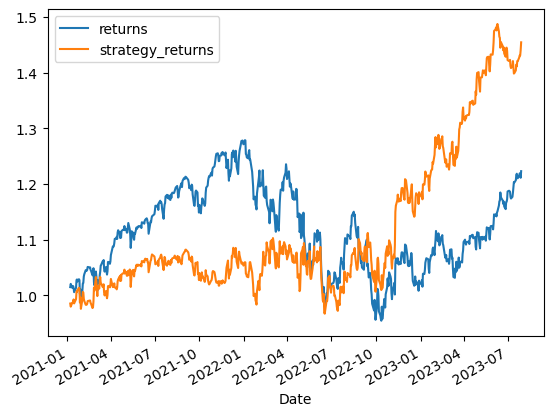

In [16]:
# We calculate the cumulative sum of "returns" and "strat_Logit" with .cumsum().
# The cumulative sum of returns represents the total returns over time, taking into account the compounding effect of daily returns.
# This provides a way to visualize and compare the overall performance of an investment or a trading strategy over a certain period.
np.exp(df[["returns", "strategy_returns"]].cumsum()).plot();


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(df, shuffle = False, test_size = 0.25, random_state = 1) # train_test_split function from sklearn library is used to split the original DataFrame df into two sets: a training set and a test set.
# shuffle = False means that the data will not be shuffled before splitting. This is useful for time series data, where the order of dates matter.
# random_state = 0 sets the seed used by the random number generator. Setting a specific value (like 0 here) will ensure our results can be replicated.

In [19]:
train = train.copy() # What train.copy() does is create a copy of the original train dataframe, but altering the copy will not alter the original.

In [20]:
test = test.copy()

In [21]:
model = LogisticRegression()

In [22]:
model.fit(train[dirnames], train["direction"])

LogisticRegression()

In [23]:
test["model_predicted_direction"] = model.predict(test[dirnames])

In [35]:
test["strategy_returns"] = test["model_predicted_direction"] * test["returns"]
test

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag1,Lag1dir,Lag2,Lag2dir,model_predicted_direction,strategy_returns
Date,,,,,,,,,,,,,,
2022-12-06,399.420013,399.989990,391.640015,393.829987,389.093964,77972200,-0.014520,-1,-0.018153,-1,-0.001154,-1,1,-0.014520
2022-12-07,392.940002,395.640015,391.970001,393.160004,388.432037,65927900,-0.001703,-1,-0.014520,-1,-0.018153,-1,1,-0.001703
2022-12-08,395.140015,397.359985,393.269989,396.239990,391.474976,60737900,0.007803,1,-0.001703,-1,-0.014520,-1,1,0.007803
2022-12-09,394.940002,397.619995,393.149994,393.279999,388.550568,81447700,-0.007498,-1,0.007803,1,-0.001703,-1,1,-0.007498
2022-12-12,394.109985,398.950012,393.410004,398.950012,394.152435,75405800,0.014314,1,-0.007498,-1,0.007803,1,-1,-0.014314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,453.369995,455.040009,452.299988,454.200012,454.200012,54023400,0.004457,1,0.000000,-1,-0.006657,-1,1,0.004457
2023-07-25,453.920013,456.739990,453.869995,455.440002,455.440002,55191200,0.002726,1,0.004457,1,0.000000,-1,1,0.002726
2023-07-26,454.470001,456.989990,453.380005,455.510010,455.510010,71052900,0.000154,1,0.002726,1,0.004457,1,1,0.000154


In [25]:
np.exp(test[["returns", "strategy_returns"]].sum())

returns             1.143472
strategy_returns    1.056978
dtype: float64

<AxesSubplot:xlabel='Date'>

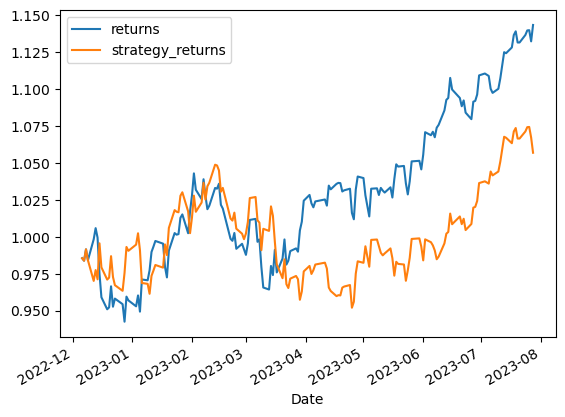

In [26]:
np.exp(test[["returns", "strategy_returns"]].cumsum()).plot()

In [27]:
from sklearn import metrics # Speaking generally, the metrics module is used to calculate how well a model is performing. 

In [34]:
# confusion_matrix is part of the metrics module. It is used to evaluate the performance of our logistic regression model by comparing its predictions (test["prediction_Logit"]) with the actual outcomes (test["direction"]), and summarizing the results in a confusion matrix.
metrics.confusion_matrix(test["direction"], test["model_predicted_direction"])
# Looking at the output:
  # Top Left of the array represents the number of times the model correctly predicted that the stock price would decrease (or stay the same) (True Negatives).
  # Top right represents the number of times the model incorrectly predicted that the stock price would increase (False Positives).
  # Bottom left represents the number of times the model incorrectly predicted that the stock price would decrease (or stay the same) (False Negatives).
  # Bottom right represents the number of times the model correctly predicted that the stock price would increase (True Positives).

array([[19, 54],
       [23, 65]], dtype=int64)

In [29]:
print(metrics.classification_report(test["direction"], test["model_predicted_direction"]))
# classification_report is part of the metrics module. It provides a more detailed performance analysis compared to the confusion matrix.
# precision is the ability of the classifier (the model) not to label a sample which is negative as positive. It is True Positive (TP) divided by (TP+FP).
# recall is the ability of the classifier to find all positive samples. It is TP divided by (TP+FN).
# f1-score is the harmonic mean of precision and recall. To understand this, visit: https://www.investopedia.com/terms/h/harmonicaverage.asp
# support tells us how many occurences happen in both 1 and -1 in the test set.

              precision    recall  f1-score   support

          -1       0.45      0.26      0.33        73
           1       0.55      0.74      0.63        88

    accuracy                           0.52       161
   macro avg       0.50      0.50      0.48       161
weighted avg       0.50      0.52      0.49       161

